## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/College/sem\ 7

/content/drive/MyDrive/College/sem 7


In [ ]:
ls

 test/   train/   Transfer_Learning_VGG_16.ipynb  "UT1'_PP.ipynb"


In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1355s 8s/step - loss: 0.2235 - accuracy: 0.9174 - val_loss: 0.2312 - val_accuracy: 0.9167
Epoch 2/5
163/163 [==============================] - 127s 778ms/step - loss: 0.1071 - accuracy: 0.9609 - val_loss: 0.5207 - val_accuracy: 0.8317
Epoch 3/5
163/163 [==============================] - 124s 759ms/step - loss: 0.0979 - accuracy: 0.9615 - val_loss: 0.3062 - val_accuracy: 0.9022
Epoch 4/5
163/163 [==============================] - 127s 777ms/step - loss: 0.0931 - accuracy: 0.9643 - val_loss: 0.3309 - val_accuracy: 0.8958
Epoch 5/5
163/163 [==============================] - 125s 769ms/step - loss: 0.0719 - accuracy: 0.9737 - val_loss: 0.3229 - val_accuracy: 0.9022


In [ ]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_set, len(test_set))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Pneumonia','Normal']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

<ipython-input-19-19b2a6e7ef7e>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, len(test_set))


Confusion Matrix
[[186  48]
 [ 13 377]]
Classification Report
              precision    recall  f1-score   support

   Pneumonia       0.93      0.79      0.86       234
      Normal       0.89      0.97      0.93       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



In [ ]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3





In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
import tensorflow as tf
tf.version.VERSION

'2.4.1'

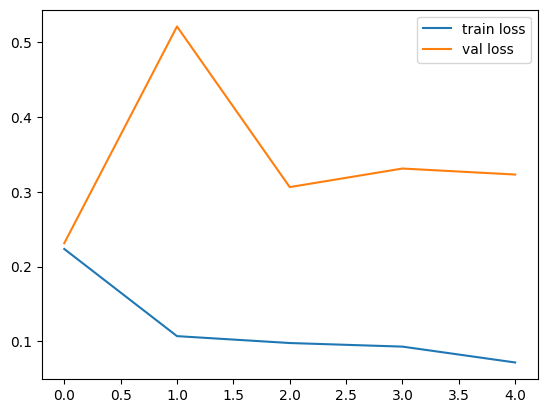

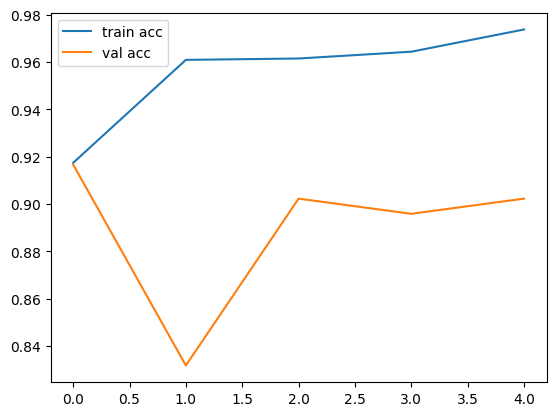

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_16')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_16')